# Loss vs Wavelength in Glass Tube

This uses the 3 layer exact RadialStep class and 2 layer StepExact class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from step_exact import RadialStep4, plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

# Four Layer Study: Glass outside Air (Outside Cladding)

In [3]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = RadialStep4(r1=15*2.7183333333333333e-6, t1=15*2/3*1e-6, t2=15*2.7183333333333333e-6, t3=15*1e-6,
                   scale=15e-6, R1_maxh=5, R2_maxh=5, R3_maxh=5, R4_maxh=6, wavelength=wl)

    k_low = A.k1 * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.hybrid_det_matrix, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.hybrid_det_matrix(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.33280436820458-2.3073697468180943e-07j) . Residual of determinant:  2.7912242935034514e-11 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23672165964359-2.0193475409441526e-07j) . Residual of determinant:  1.7077508792585376e-10 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14091441191503-1.7983732390948276e-07j) . Residual of determinant:  1.3028908937415603e-10 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04538103871664-1.6264008640658415e-07j) . Residual of determinant:  2.0333162739704232e-10 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95012007409349-1.4912529612959162e-07j) . Residual of determinant:  1.0942466239344644

scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (63.77647137544909-6.769314280204698e-05j) . Residual of determinant:  1.8636179244331384e-15 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.69381912991547-8.706597354143143e-06j) . Residual of determinant:  3.038700077391285e-12 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

Scaled beta:  (63.60727874291911-4.506386247556775e-06j) . Residual of determinant:  3.4120771476228886e-12 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Scaled beta:  (63.521292420214046-2.6234776054557367e-06j) . Residual of determinant:  2.0174779957579651e-13 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

Scaled beta:  (63.43564864097496-1.7010143972999311e-06j) . Residual of determinant:  1.0936721473077824e-11 


     --------------------  45/301: wavel

Scaled beta:  (60.42540811134803-3.045752278412702e-07j) . Residual of determinant:  5.173645719007509e-11 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  --------------------     

Scaled beta:  (60.348009839974225-3.413081973387822e-07j) . Residual of determinant:  7.39052491597193e-11 


     --------------------  83/301: wavelength: 1.564e-06  --------------------     

Scaled beta:  (60.27080807614161-3.8701350428779546e-07j) . Residual of determinant:  3.282773840003681e-11 


     --------------------  84/301: wavelength: 1.566e-06  --------------------     

Scaled beta:  (60.193801730436746-4.4467900888477365e-07j) . Residual of determinant:  2.062968012423513e-11 


     --------------------  85/301: wavelength: 1.5679999999999999e-06  --------------------     

Scaled beta:  (60.11698960967507-5.186548690225388e-07j) . Residual of determinant:  1.9889432213186804e-11 


     --------------------  86/301: wavelength: 1.57e-06  --------------------   

Scaled beta:  (57.547534624510504-2.2108700945418167e-07j) . Residual of determinant:  5.0728943065603584e-11 


     --------------------  121/301: wavelength: 1.64e-06  --------------------     

Scaled beta:  (57.47733101099399-2.1428822403214285e-07j) . Residual of determinant:  1.0258487696712664e-10 


     --------------------  122/301: wavelength: 1.642e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (57.40729862974658-2.0879702335236316e-07j) . Residual of determinant:  1.5137423934619055e-11 


     --------------------  123/301: wavelength: 1.6439999999999998e-06  --------------------     

Scaled beta:  (57.337436811414-2.0448305251787194e-07j) . Residual of determinant:  6.832247807386036e-11 


     --------------------  124/301: wavelength: 1.646e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.26774489467136-2.012458649798408e-07j) . Residual of determinant:  1.151424809252744e-10 


     ---------------

Scaled beta:  (54.86619326110254-1.370484141101867e-05j) . Residual of determinant:  6.39744984551261e-13 


     --------------------  161/301: wavelength: 1.7199999999999998e-06  --------------------     

Scaled beta:  (54.8020876117511-2.5741858482702454e-05j) . Residual of determinant:  2.9440120348988255e-13 


     --------------------  162/301: wavelength: 1.7219999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.72765286159873-0.0003620428848799473j) . Residual of determinant:  5.80540421414708e-16 


     --------------------  163/301: wavelength: 1.724e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.6809697038341-1.746089007896022e-05j) . Residual of determinant:  2.317384443934257e-12 


     --------------------  164/301: wavelength: 1.7259999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (54.615163193841475-1.670366686901567e-05j) . Residual of determinant:  3.2205921741576407e-12 



Scaled beta:  (52.483595165997144-2.750643106089187e-07j) . Residual of determinant:  1.5700897679125977e-11 


     --------------------  200/301: wavelength: 1.798e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.42519239063501-2.7600050784598736e-07j) . Residual of determinant:  2.2852315558326556e-11 


     --------------------  201/301: wavelength: 1.8e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.3669193687701-2.778293599910709e-07j) . Residual of determinant:  2.3440962125467238e-11 


     --------------------  202/301: wavelength: 1.8019999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (52.308775648391936-2.805644740563398e-07j) . Residual of determinant:  1.722988635831198e-11 


     --------------------  203/301: wavelength: 1.804e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.2507607794412-2.8423108729416345e-07j) . Residual of determinant:  4.7997325609530306e-11 


    

Scaled beta:  (50.459441725445174-6.455373149108609e-06j) . Residual of determinant:  6.724222339417237e-14 


     --------------------  236/301: wavelength: 1.8699999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (50.40535086434048-8.97912256266699e-06j) . Residual of determinant:  9.854527949808916e-13 


     --------------------  237/301: wavelength: 1.8719999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (50.35134003777751-1.3151172295016999e-05j) . Residual of determinant:  1.3549650635141889e-12 


     --------------------  238/301: wavelength: 1.8739999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (50.297390804719704-2.0492062939077947e-05j) . Residual of determinant:  7.270401725726146e-13 


     --------------------  239/301: wavelength: 1.876e-06  --------------------     

Scaled beta:  (50.24347527951101-3.4095041874446786e-05j) . Residual of

scaling guess: 1
Scaled beta:  (48.48682884451388-4.503659129899036e-07j) . Residual of determinant:  1.5454658629108938e-11 


     --------------------  274/301: wavelength: 1.9459999999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (48.436972611468605-4.393460634674186e-07j) . Residual of determinant:  3.1228532071653245e-11 


     --------------------  275/301: wavelength: 1.948e-06  --------------------     

Scaled beta:  (48.387218936468955-4.2978104889153994e-07j) . Residual of determinant:  1.6746530840627604e-11 


     --------------------  276/301: wavelength: 1.95e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (48.33756747781594-4.215510558142185e-07j) . Residual of determinant:  7.977471844187255e-12 


     --------------------  277/301: wavelength: 1.952e-06  --------------------     

Scaled beta:  (48.28801789758154-4.145554172648951e-07j) . Residual of determinant:  1.271040289

In [4]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.n1  # Inner (core) index
n2 = A.n2  # Cladding index

d = 15*2/3*1e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

In [5]:
mask = np.where(-betas1.imag>0)

<IPython.core.display.Javascript object>


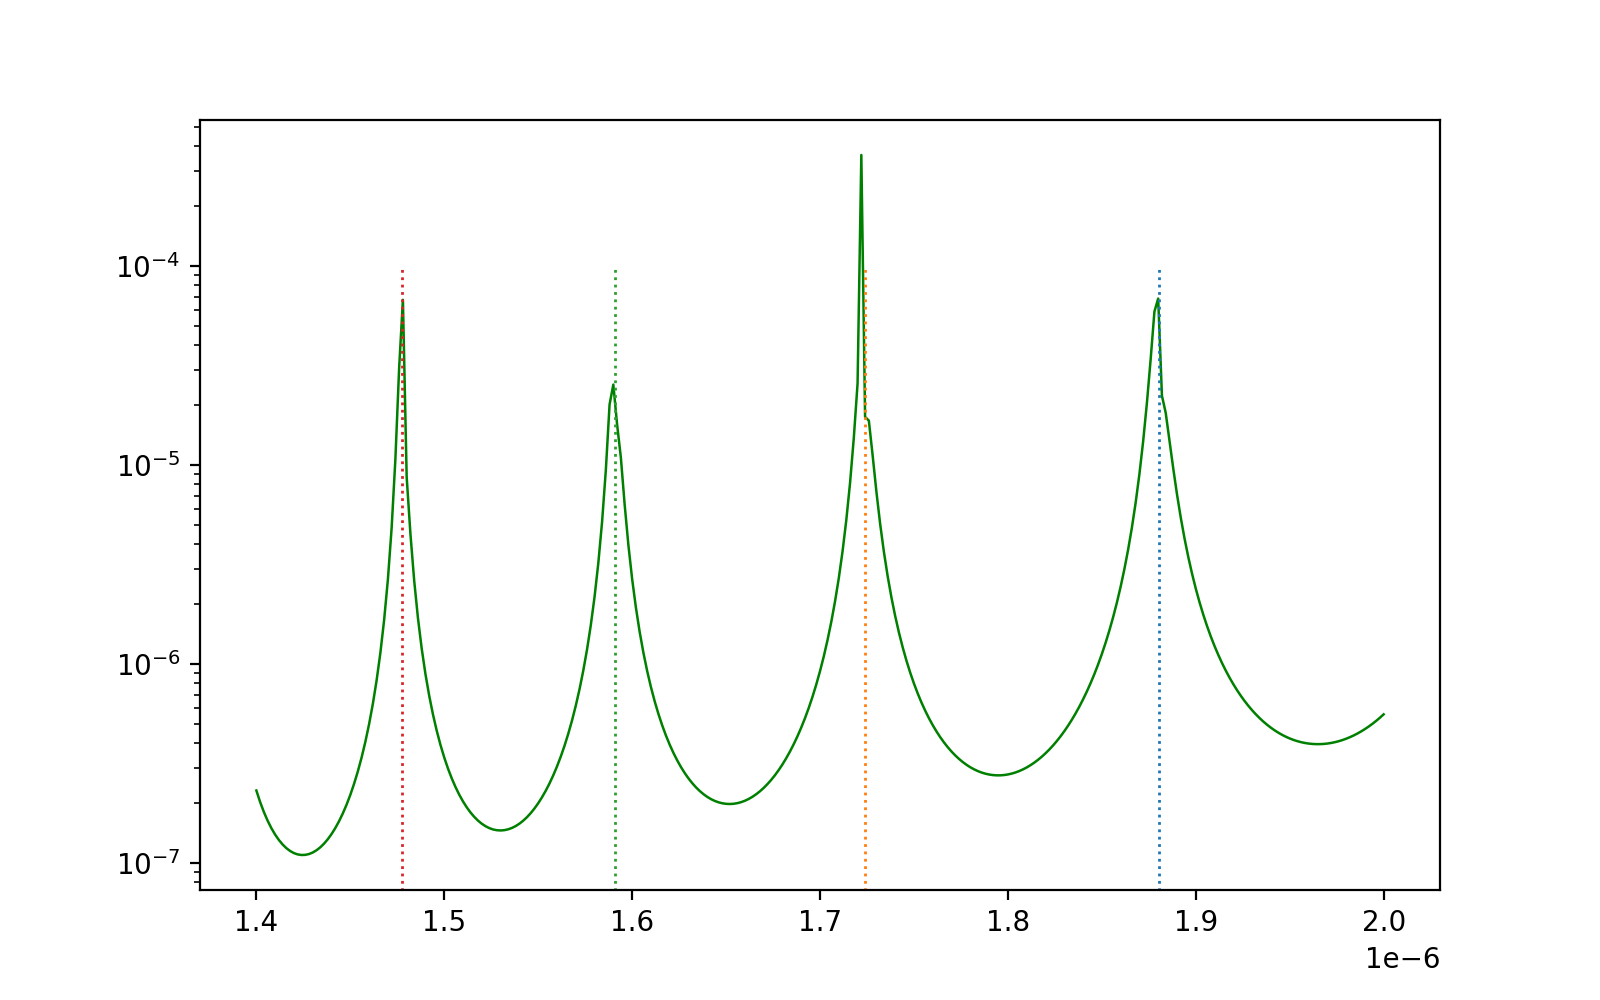

In [6]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, linestyle=':')

In [7]:
np.save('exact_scaled_betas', betas1)